In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import IPython.display as ipd
from scipy.io import wavfile

In [2]:
%matplotlib widget

In [3]:
def correlate(x, y):
    """correlate two pre-normalized arrays of same size"""
    N = x.size
    return np.sum(x * y) / N


def autocorrelate(x):
    """return cyclical autocorrelation function"""    
    x = x[~np.isnan(x)] # remove nan
    mu = np.mean(x)
    std = np.std(x)
    norm = (x - mu) / std #normalize
    N = x.size
    ac = [correlate(norm, np.roll(norm, -j)) for j in range(N)]
    return np.array(ac)

In [4]:
# read wav file
samplerate, data = wavfile.read("baby_shark.wav")
print(samplerate, "samples per second")

44100 samples per second


In [5]:
def getAudioSlice(data, samplerate, start_time=0, duration=5):
    start_sample = int(samplerate * start_time)
    end_sample = start_sample + duration * samplerate
    audio_slice = data[start_sample:end_sample]  
    return audio_slice


<IPython.core.display.Javascript object>


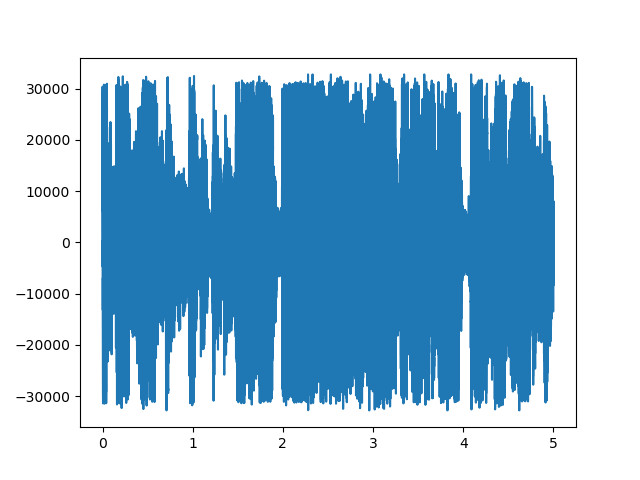

In [6]:
plt.figure()
audio_slice = getAudioSlice(data,samplerate, start_time=10)
plt.plot(np.arange(audio_slice.size) / samplerate, audio_slice) 
ipd.display(ipd.Audio(audio_slice, rate=samplerate))

In [ ]:
# pre-compute autocorrelations for every five seconds
# don't run this cell in lab as it takes a long time
# instead use next cell that loads the precomputed data


#allAC =[]
#for st in range(10, 90, 5):
#    audio_slice = getAudioSlice(data,samplerate, start_time=st)
#    ac = autocorrelate(audio_slice)
#    allAC.append(ac)
#np.array(allAC)
#np.save("baby_shark_ac_5s", ac.astype('float32'))

In [12]:
# load pre-computed auto correlations
ac = np.load("baby_shark_ac_5s.npy")
ac.shape


(16, 220500)

<IPython.core.display.Javascript object>


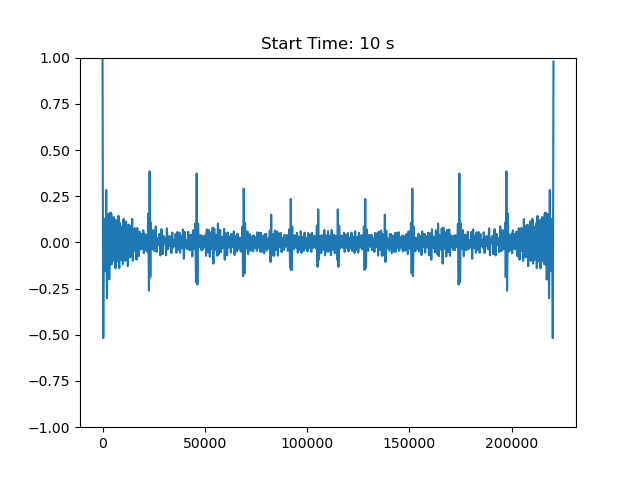

interactive(children=(IntSlider(value=0, description='row', max=15), Output()), _dom_classes=('widget-interact…

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(np.arange(ac.shape[1]), ac.shape[1] * [0])
ax.set_ylim(-1,1)
def viewAC(row=0):
    line.set_ydata(ac[row])
    
    fig.canvas.draw_idle()
    ax.set_title("Start Time: %i s" % (row*5 + 10))
    
interact(viewAC, row=(0, 15));
                